In [1]:
from ArgumentModel import ArgumentModel
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [3]:
model = ArgumentModel(num_agents=10, verbose=False)

model.run_n_steps(10)

In [4]:
df_model = model.datacollector.get_model_vars_dataframe()
df = pd.DataFrame(dict(df_model.iloc[-1]["Commited"]))
df = df.applymap(lambda x: [] if not type(x) == list else x)

total = {}
df['total'] = np.zeros(len(df))
for agent in df:
    total[agent] = set()
    for val in df[agent].values:
        total[agent] = total[agent].union(set(val))
    
    df['total'][agent] = total[agent]

display(df)
agreed = df['total'][0]
for i in df['total'][1:]:
    agreed = agreed.intersection(i)
print(f"Agreed: {list(agreed)}")

all_accepted = []
for i in df['total']:
    for j in i:
        all_accepted.append(j)

/tmp/ipykernel_1741692/828200531.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total'][agent] = total[agent]


,Agent 1,Agent 2,Agent 3,Agent 4,Agent 5,Agent 6,Agent 7,Agent 8,Agent 9,Agent 10,total
Agent 10,[Energi],[Energi],[],[Transf],[],[Energi],[],[],[],[],"{Energi, Transf}"
Agent 5,[],"[Info, Transf]",[],[Transf],[],[],[],[],[],[Transf],"{Info, Transf}"
Agent 3,[],"[Info, Design]",[],[],[],[],[],[Info],[Info],[],"{Info, Design}"
Agent 6,[],[Energi],[],[],[],[],[],[],[],[Energi],{Energi}
Agent 9,[],[],[Info],[],[],[],[],[],[],[],{Info}
Agent 2,[],[],"[Info, Design]",[],"[Info, Transf]",[Energi],[],[],[],[Energi],"{Info, Transf, Design, Energi}"
Agent 8,[],[],[Info],[],[],[],[Nucléaire],[],[],[],"{Info, Nucléaire}"
Agent 7,[],[],[],[Transf],[],[],[],[Nucléaire],[],[],"{Nucléaire, Transf}"
Agent 4,[],[],[],[],[Transf],[],[Transf],[],[],"[Transf, Energi]",{Transf}
Agent 1,[],[],[],[],[],[],[],[],[],[Energi],{Energi}


Agreed: []


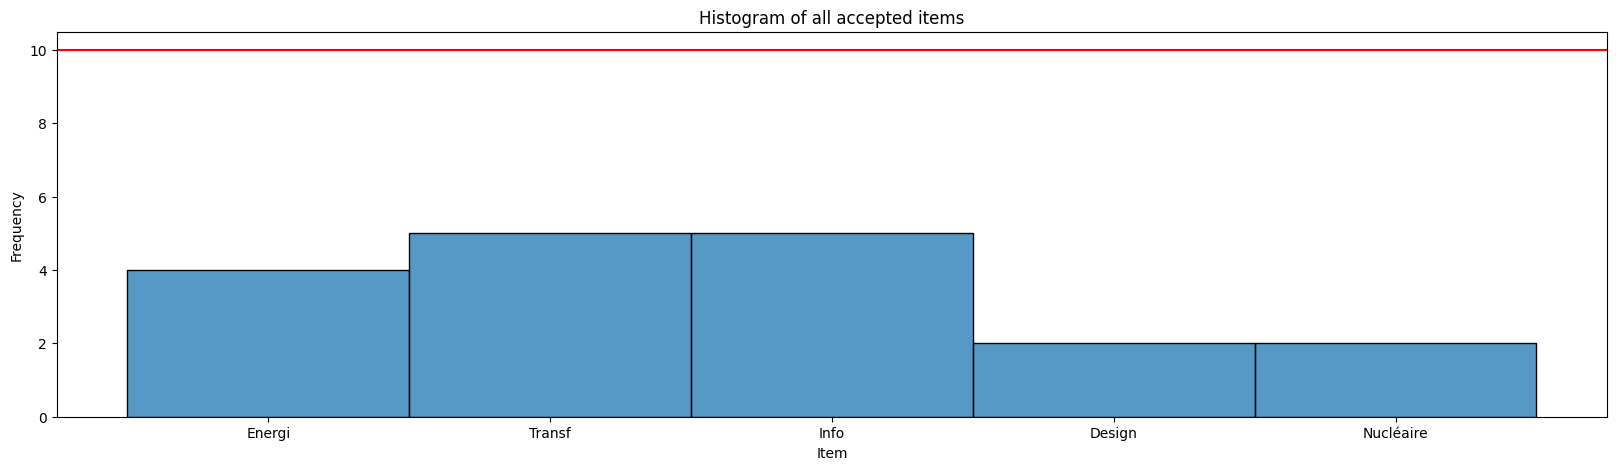

In [5]:
plt.figure(figsize=(20, 5))
sns.histplot(all_accepted, bins=len(set(all_accepted)))
plt.title("Histogram of all accepted items")
plt.xlabel("Item")
plt.ylabel("Frequency")

plt.axhline(y=10, color='r', linestyle='-', label="Number of agents")
